# **Overview**  
Sentiment analysis plays a crucial role in understanding customer perceptions, brand reputation, and product feedback. By leveraging Natural Language Processing (NLP) techniques, businesses can extract meaningful insights from customer reviews, social media comments, and survey responses.  

This project aims to develop a **sentiment classification model** to analyze tweets and categorize them into three sentiment labels:  
- **Positive Emotion** – Indicates favorable sentiment towards the brand or product.  
- **Negative Emotion** – Reflects dissatisfaction or complaints.  
- **No Emotion** – Neutral feedback with no strong sentiment.  

The model is built using **LSTM (Long Short-Term Memory) networks** and **pre-trained GloVe embeddings** to improve text representation. By implementing deep learning techniques, we enhance the accuracy and reliability of sentiment classification.  

---

# **Business Problem**  
Companies struggle to manually analyze vast amounts of customer feedback on social media. This project aims to automate sentiment analysis of tweets, helping businesses:  

- **Monitor Brand Perception** – Detect positive and negative sentiment trends.  
- **Improve Customer Experience** – Identify complaints and enhance service.  
- **Automate Analysis** – Reduce manual effort and enable real-time insights.  
- **Enhance Marketing & Engagement** – Personalize responses and target key audiences.  

By leveraging deep learning, businesses can make data-driven decisions and optimize customer interactions.  

# **Objectives**  

1. **Automate Sentiment Detection**  
   - Develop an AI-powered model to classify customer sentiments (positive, negative, neutral) with high accuracy.  

2. **Enhance Brand Reputation Management**  
   - Identify and address negative sentiments in real time to improve customer satisfaction and brand perception.  

3. **Optimize Marketing Strategies**  
   - Leverage sentiment insights to refine advertising campaigns, product messaging, and customer engagement.  

4. **Reduce Manual Analysis Effort**  
   - Implement an automated system to analyze large volumes of customer feedback, minimizing reliance on manual labor.  


# **Metrics of Success**  

1. **Accuracy** – Achieve at least 75% accuracy in sentiment multi-class classification.  
2. **F1-Score** – Ensure a balanced F1-score across all sentiment categories to handle class imbalances.  
3. **Confusion Matrix Analysis** – Minimize misclassification rates, especially for negative sentiments.  
4. **Business Impact** – Reduce response time to negative feedback and improve customer satisfaction scores.  


## Data Understanding  

### **1️⃣ Overview of the Dataset**  
The dataset consists of tweets labeled with emotions directed at brands or products for sentiment classification.  
Each row contains:  
- **tweet_text** → The actual tweet text  
- **emotion_in_tweet_is_directed_at** → The brand or product mentioned in the tweet  
- **is_there_an_emotion_directed_at_a_brand_or_product** → The sentiment label (Positive, Negative, or No emotion)  

---

### **2️⃣ Sample Data**  
Below is a preview of the dataset:  

| tweet_text                                            | emotion_in_tweet_is_directed_at | is_there_an_emotion_directed_at_a_brand_or_product |
|------------------------------------------------------|---------------------------------|--------------------------------------------------|
| .@wesley83 I have a 3G iPhone. After 3 hrs twe...  | iPhone                          | Negative emotion                               |
| @jessedee Know about @fludapp ? Awesome iPad/i...  | iPad or iPhone App              | Positive emotion                               |
| @swonderlin Can not wait for #iPad 2 also. The...  | iPad                             | Positive emotion                               |
| @sxsw I hope this year's festival isn't as cra...  | iPad or iPhone App              | Negative emotion                               |
| @sxtxstate great stuff on Fri #SXSW: Marissa M...  | Google                          | Positive emotion                               |

---

### **3️⃣ Data Source**  
[Brands and Product Emotions Dataset](https://data.world/crowdflower/brands-and-product-emotions)  


In [1]:
import numpy as np
import pandas as pd
import summarytools as st
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
nltk.download('stopwords')
from sklearn.svm import SVC
nltk.download('punkt_tab')
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# Ensure required NLTK resources are downloaded

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rkeoye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rkeoye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rkeoye\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rkeoye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rkeoye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
#Reading the data and displaying top 5 rows
Tweets_df=encoding=pd.read_csv(r'C:\Users\rkeoye\Documents\AUDIT_2024\DATA_SCIENCE\PHASE 4\PROJECT\Sentiment_Analysis\judge-1377884607_tweet_product_company.csv',encoding='latin1')

Tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#understanding the structure of our dataset
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


`Tweets_df` has 9093 rows and 3 object-type columns, with missing values in `tweet_text` and   `emotion_in_tweet_is_directed_at`.  



In [4]:
#obtain the total number of missing values per feature
Tweets_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [5]:
# Drop the 'emotion_in_tweet_is_directed_at' column as it contains over 63% missing values  
Tweets_df = Tweets_df.drop(columns=['emotion_in_tweet_is_directed_at'])

`Tweets_df` has 9093 rows and 3 columns, with 1 missing value in `tweet_text` and 5802 in `emotion_in_tweet_is_directed_at`.  


In [6]:
# remove rows where the tweet_text column has missing values. Now, Tweets_df will have 9092 rows instead of 9093
Tweets_df= Tweets_df.dropna(subset=["tweet_text"])

In [7]:
Tweets_df.duplicated().sum()

22

Our dataset Tweets_df has 22 duplicate rows

In [8]:
#remove the 22 duplicate rows from Tweets_df, ensuring all remaining rows are unique. 
Tweets_df=Tweets_df.drop_duplicates()

In [9]:
#understanding the structure of our dataset in details
st.dfSummary(Tweets_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,tweet_text[object],1. RT @mention RT @mention It's n2. Win free ipad 2 from webdoc.co3. Win free iPad 2 from webdoc.co4. RT @mention Marissa Mayer: Goo5. RT @mention Marissa Mayer: Goo6. .@wesley83 I have a 3G iPhone.7. RT @mention I may not have inv8. RT @mention I just fell asleep9. RT @mention I just found BBQ s10. RT @mention I know it's #SXSW 11. other,"2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)9,055 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,is_there_an_emotion_directed_at_a_brand_or_product[object],1. No emotion toward brand or pro2. Positive emotion3. Negative emotion4. I can't tell,"5,375 (59.3%)2,970 (32.7%)569 (6.3%)156 (1.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACA0lEQVR4nO3dQWrbQACF4VEwodlIGIMPo0P0sD2EbmOMtahDNuqiaWm6cnD8xtZ83867SfiRkdDD3bIsBRKeah+AdoiNmK6U8lJKea59kIa8Lctyrn2IGja73e573/fb2gdpxTzPx67rfrQY3Kbv++04judhGF5rH2btTqfTt2matofD4bmU0l5spZQyDMPrfr//WfswjXipfYBa3CAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGbUn6/+lL7IC1o/f+8mef5OE3TtjT86kvSPM/HUspb7XPU4LXwvGZfC+9M+Uhxg0DM2r5Gm/2KegSrWle1vFx6BKtZV7W+XHoEa1tXeXxzx9wgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmNVO+NfwNa7eqKV/LM7lHYINAjCkfMZ+5srlqcJWL11WWS1zronWV5RJf4TPrqoe/W6UuD3WJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEXPRuspyia9w8brKcolr2SAQY11FzP9XNlcvbubDusqCilt6+rOuGsfx/B7dWtbx3Jm/66r3zxZU3IyHusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIWc1vV3H//l1XWVBxUzYIxFhXEeMGgZhfvAnMWpoEZdcAAAAASUVORK5CYII="">",0(0.0%)


In [10]:
#drop the category "I cant tell" from the label "is_there_an_emotion_directed_at_a_brand_or_product"
Tweets_df = Tweets_df.drop(Tweets_df[Tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"].index)

In [11]:
#Rename the label to'Emotion_category' 
Tweets_df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion_category'}, inplace=True)

### EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\rkeoye\AppData\Local\Temp\ipykernel_22648\3686918895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=Tweets_df["Emotion_category"], palette="viridis")


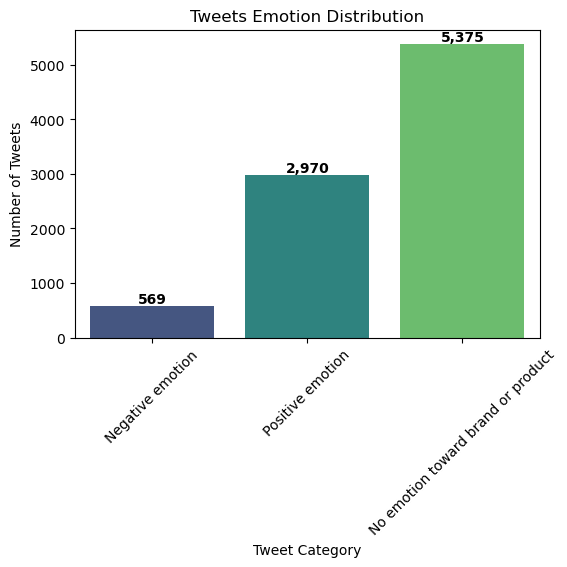

In [12]:
# Visualize the class distribution for train data
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=Tweets_df["Emotion_category"], palette="viridis")

# Add value labels without decimal points
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",  # Convert height to int
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Tweets Emotion Distribution")
plt.xlabel("Tweet Category")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()


- The majority of tweets (5,375) express no emotion toward a brand or product, while 2,970 tweets convey positive emotions.  
- Negative emotions are the least frequent, with only 569 tweets.


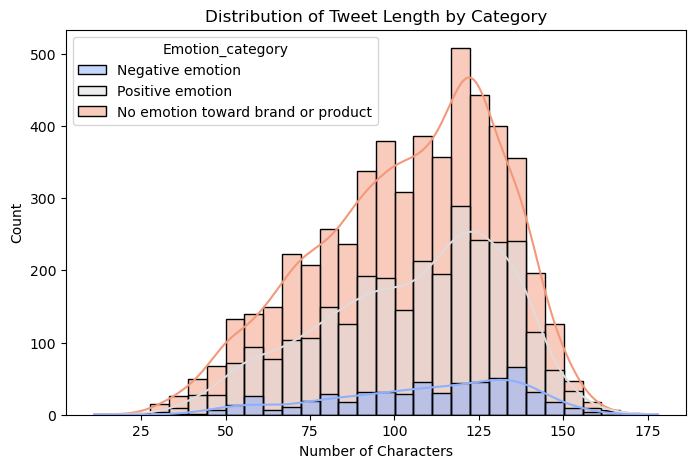

In [13]:
#Check word distribution
Tweets_df["tweet_length"] = Tweets_df["tweet_text"].apply(lambda x: len(str(x)))

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(Tweets_df, x="tweet_length", hue="Emotion_category", kde=True, bins=30, palette="coolwarm")
plt.title("Distribution of Tweet Length by Category")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()

- Most tweets fall between 75 and 150 characters, with neutral tweets being the most frequent across all lengths.  
- Negative and positive tweets follow a similar distribution, but negative tweets are generally fewer in number. 
- The "No emotion toward brand or product" category dominates the distribution, peaking around 125 characters.  
- All of them follow roughtly a  normal distribution, with most tweets falling between 75 and 150 characters.  



## DATA PREPROCESSING

In [14]:
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\d+', ' ', text)  # Remove all digits
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_list = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    # Return the preprocessed text
    return preprocessed_text

Preprocessing tweets by removing special characters, lowercasing, tokenizing, removing stopwords, and lemmatizing.


In [15]:
# Apply preprocessing to train and test data
#print(train_data.columns)
Tweets_df['tweet_text_prep'] = Tweets_df['tweet_text'].apply(preprocess_text)
Tweets_df.head()

,tweet_text,Emotion_category,tweet_length,tweet_text_prep
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,wesley g iphone hr tweeting rise_austin dead n...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,sxtxstate great stuff fri sxsw marissa mayer g...


Preprocessed tweet text is now stored in the `tweet_text_prep` column, which has been cleaned, tokenized, and lemmatized for analysis.

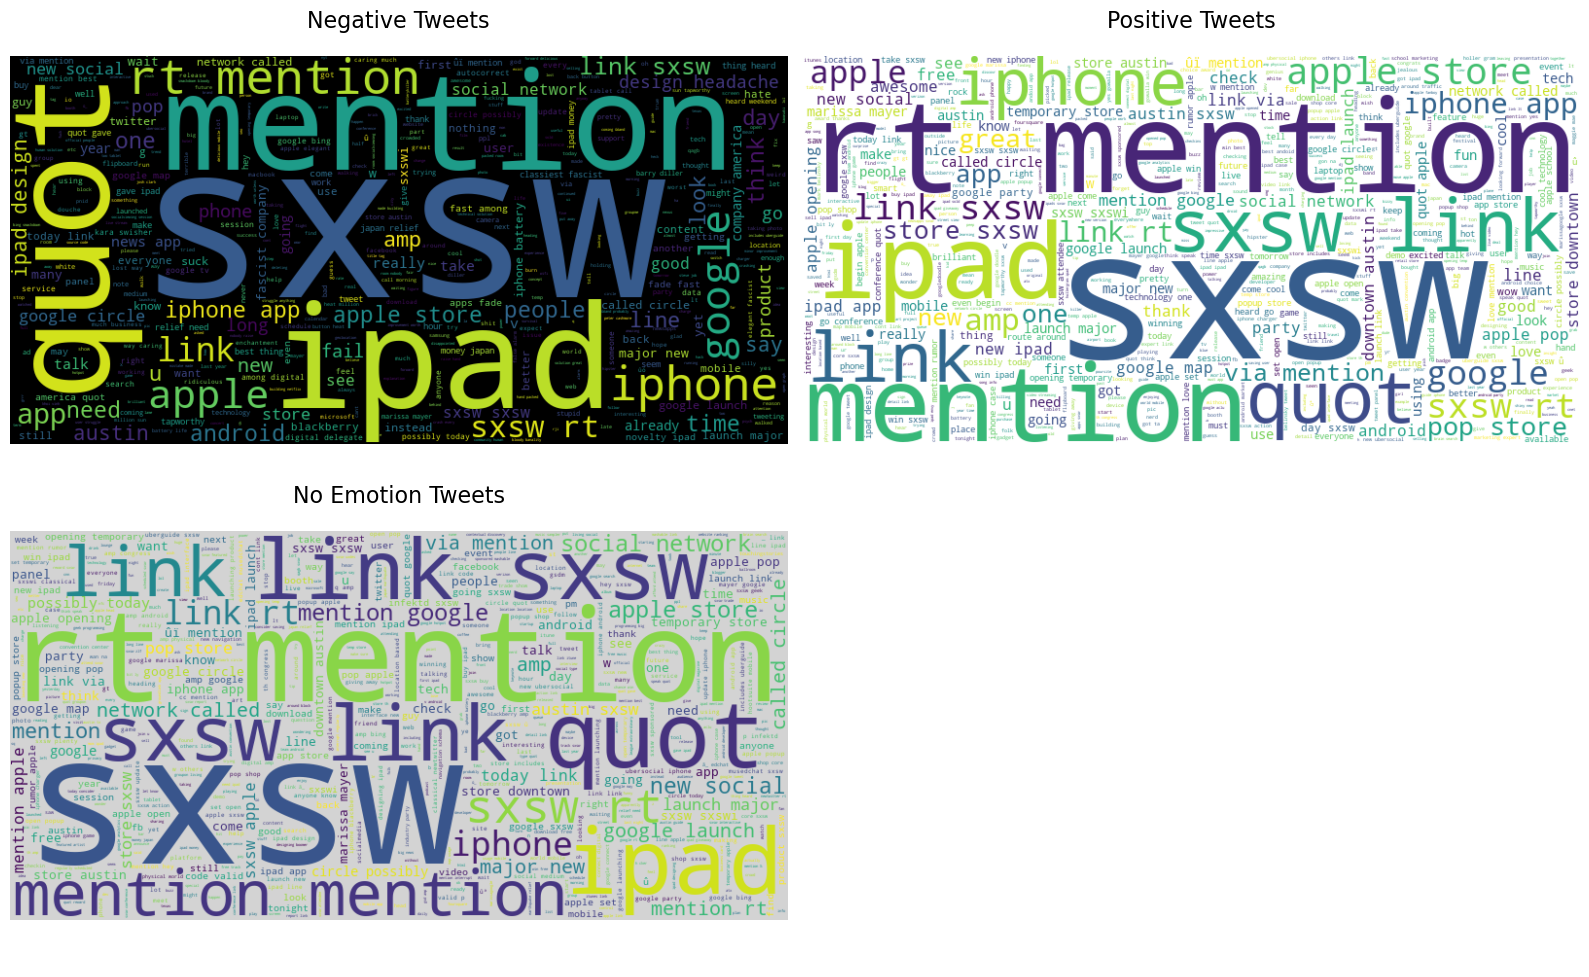

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
negative_text = ' '.join(Tweets_df[Tweets_df['Emotion_category'] == 'Negative emotion']['tweet_text_prep'])
positive_text = ' '.join(Tweets_df[Tweets_df['Emotion_category'] == 'Positive emotion']['tweet_text_prep'])
no_emotion_text = ' '.join(Tweets_df[Tweets_df['Emotion_category'] == 'No emotion toward brand or product']['tweet_text_prep'])
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Titles and background colors
titles = ['Negative Tweets', 'Positive Tweets', 'No Emotion Tweets']
bg_colors = ['black', 'white', 'lightgray']
texts = [negative_text, positive_text, no_emotion_text]

# Generate and plot word clouds
for i, ax in enumerate(axes.flat[:3]):  # Use only the first 3 subplots
    ax.set_title(titles[i], fontsize=16, color='black', pad=20)
    wordcloud = WordCloud(width=800, height=400, max_words=3000, background_color=bg_colors[i], stopwords=set(STOPWORDS)).generate(texts[i])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Hide the fourth subplot
axes[1, 1].axis('off')

# Adjust layout to avoid title cutoff
plt.tight_layout()
plt.show()

- "SXSW," "mention," and "link" are the most frequently occurring words across all sentiment categories.
- Negative tweets contain words like "fail," "need," and "headache," indicating frustration.
- Positive tweets feature terms like "great," "awesome," and "love," reflecting enthusiasm.
- Neutral tweets mainly consist of event-related terms, suggesting objective discussions rather than emotional expressions.


In [17]:
# Function to extract top N-grams for sentiment analysis
def get_top_ngrams(df, emotion_label, n, top_k=10):
    text = df[df["Emotion_category"] == emotion_label]["tweet_text_prep"]
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words="english")
    X = vectorizer.fit_transform(text)
    ngram_counts = X.toarray().sum(axis=0)
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))
    sorted_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_k]
    
    return sorted_ngrams

# Get top bigrams and trigrams for positive and negative tweets
negative_bigrams = get_top_ngrams(Tweets_df, "Negative emotion", n=2)
negative_trigrams = get_top_ngrams(Tweets_df, "Negative emotion", n=3)
positive_bigrams = get_top_ngrams(Tweets_df, "Positive emotion", n=2)
positive_trigrams = get_top_ngrams(Tweets_df, "Positive emotion", n=3)
no_emotion_bigrams = get_top_ngrams(Tweets_df, "No emotion toward brand or product", n=2)
no_emotion_trigrams = get_top_ngrams(Tweets_df, "No emotion toward brand or product", n=3)
# Print results
print("Top Bigrams in Negative Tweets:", negative_bigrams)
print("Top Trigrams in Negative Tweets:", negative_trigrams)
print("Top Bigrams in Positive Tweets:", positive_bigrams)
print("Top Trigrams in Positive Tweets:", positive_trigrams)
print("Top Bigrams in No emotion Tweets:", no_emotion_bigrams)
print("Top Trigrams in No emotion Tweets:",no_emotion_trigrams)

Top Bigrams in Negative Tweets: [('rt mention', 137), ('mention sxsw', 34), ('mention google', 26), ('apple store', 25), ('iphone app', 24), ('link sxsw', 24), ('sxsw link', 24), ('ipad design', 20), ('mention mention', 20), ('ipad sxsw', 18)]
Top Trigrams in Negative Tweets: [('rt mention google', 20), ('ipad design headache', 16), ('new social network', 13), ('ipad news apps', 12), ('major new social', 12), ('fascist company america', 11), ('network called circle', 11), ('social network called', 11), ('launch major new', 10), ('rt mention quot', 10)]
Top Bigrams in Positive Tweets: [('rt mention', 903), ('sxsw link', 316), ('mention sxsw', 233), ('apple store', 223), ('link sxsw', 169), ('mention mention', 156), ('ipad sxsw', 149), ('iphone app', 136), ('pop store', 132), ('store sxsw', 123)]
Top Trigrams in Positive Tweets: [('new social network', 74), ('rt mention google', 69), ('store downtown austin', 65), ('apple pop store', 63), ('mention rt mention', 61), ('network called circ

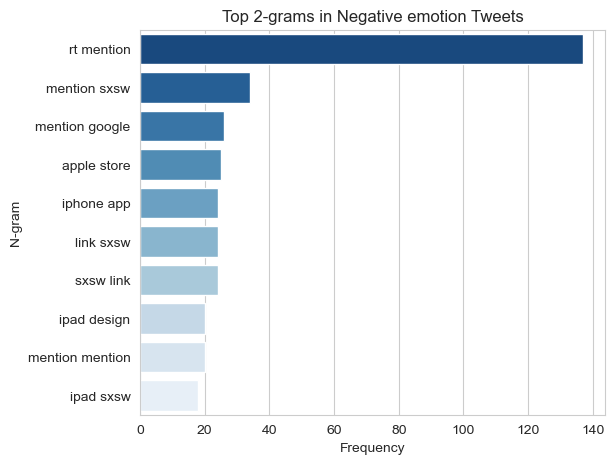

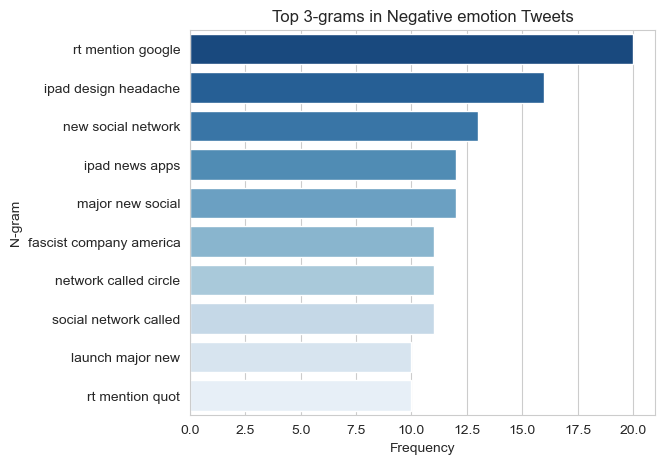

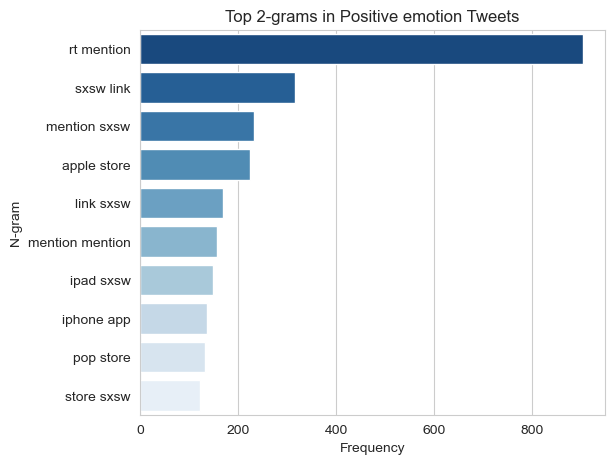

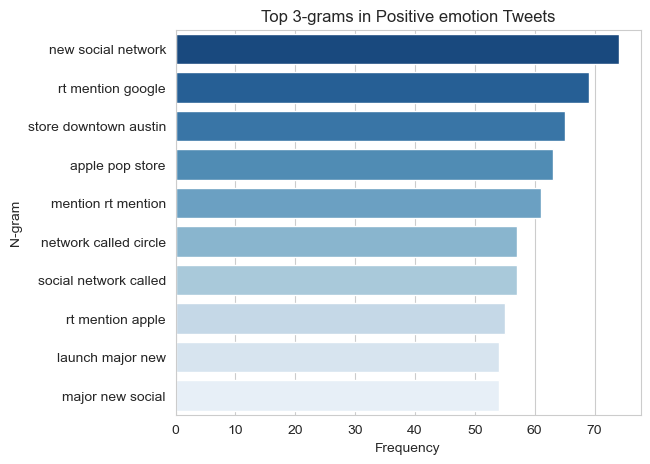

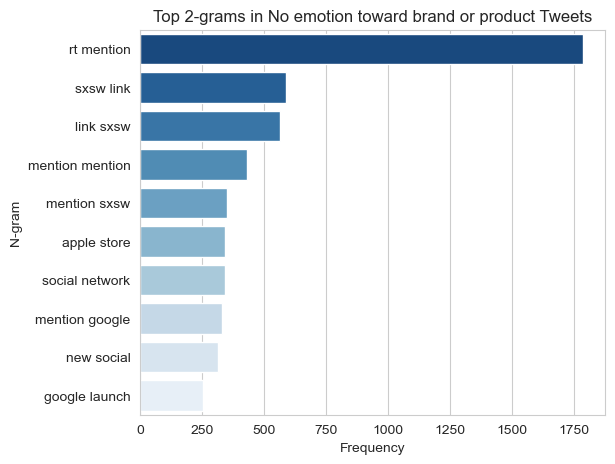

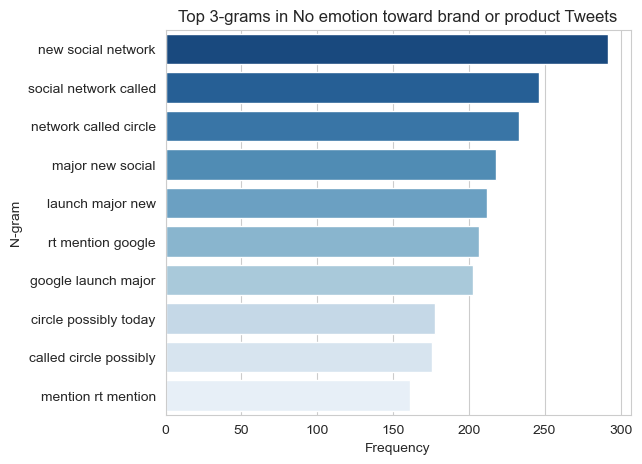

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Function to extract top N-grams
def get_top_ngrams(df, emotion_label, n, top_k=10):
    # Filter tweets based on emotion category
    text = df[df["Emotion_category"] == emotion_label]["tweet_text_prep"].dropna()
    
    # Apply CountVectorizer to extract N-grams
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words="english", min_df=2)
    X = vectorizer.fit_transform(text)
    
    # Get N-gram frequencies
    ngram_counts = X.sum(axis=0).A1
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))
    
    # Sort and return top N
    sorted_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_k]
    return pd.DataFrame(sorted_ngrams, columns=["N-gram", "Frequency"])

# Function to plot N-grams as bar charts
def plot_ngrams(df_ngrams, title):
    plt.figure(figsize=(6, 5))
    sns.barplot(y=df_ngrams["N-gram"], x=df_ngrams["Frequency"], palette="Blues_r")
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.title(title)
    plt.show()

# Extract and plot N-grams for each sentiment
for sentiment in ["Negative emotion", "Positive emotion", "No emotion toward brand or product"]:
    for n in [2, 3]:  # Bigrams and Trigrams
        df_ngrams = get_top_ngrams(Tweets_df, sentiment, n)
        plot_ngrams(df_ngrams, f"Top {n}-grams in {sentiment} Tweets")


- **"RT mention"** appears as the most frequent bigram across all sentiment categories, indicating that many tweets involve retweets and mentions.
- **Negative tweets** contain phrases like **"ipad design headache"** and **"fascist company America,"** suggesting frustration and criticism.
- **Positive tweets** highlight **"apple pop store"** and **"store downtown Austin,"** reflecting excitement about events and product launches.
- **Neutral tweets** focus on discussions around **"new social network"** and **"network called circle,"** implying objective reporting of industry trends rather than emotional opinions.
- The **trigram trends** reinforce that neutral tweets are more information-driven, while negative and positive tweets are more emotion-driven.


### BINARY MODEL DATA PREPROCESSING

In [19]:
Binary_tweets_emotions= Tweets_df[Tweets_df['Emotion_category'].isin(['Positive emotion','Negative emotion'])]
st.dfSummary(Binary_tweets_emotions[['Emotion_category']])

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Emotion_category[object],1. Positive emotion2. Negative emotion,"2,970 (83.9%)569 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)


- The dataset contains **3,539 rows and 1 column** (`Emotion_category`).
- **Duplicates:** 3,537, indicating almost all rows are duplicated.
- **Positive emotion dominates** (83.9%), while **negative emotion is much lower** (16.1%).
- The dataset is highly **imbalanced**

In [20]:
Binary_tweets_emotions.shape

(3539, 4)

The dataset has 3,539 rows, with 83.9% positive and 16.1% negative tweets, indicating a class imbalance that may require resampling.  


### HANDLING CLASS IMBALANCE

In [21]:
#we will first handle the class imbalance
from imblearn.over_sampling import SMOTE

# Separate features & target variable
X = Binary_tweets_emotions["tweet_text_prep"]
y = Binary_tweets_emotions["Emotion_category"]

# Convert text into numerical representation (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Check new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({'Negative emotion': 2970, 'Positive emotion': 2970})


SMOTE successfully balanced the dataset by oversampling the minority class, ensuring equal representation of positive and negative tweets.  


In [22]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the class distribution in the training and test set
print("Training set distribution:", Counter(y_train))
print("Test set distribution:", Counter(y_test))


Training set distribution: Counter({'Negative emotion': 2395, 'Positive emotion': 2357})
Test set distribution: Counter({'Positive emotion': 613, 'Negative emotion': 575})


### FITTING BASE MODEL

In [23]:
#Fit the base model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091
Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.87      0.95      0.91       575
Positive emotion       0.95      0.87      0.91       613

        accuracy                           0.91      1188
       macro avg       0.91      0.91      0.91      1188
    weighted avg       0.91      0.91      0.91      1188



The model achieved **90.9% accuracy**, with **high precision and recall** for both classes.  
- **Negative emotion**: Precision (87%), Recall (95%) – Slightly more false positives.  
- **Positive emotion**: Precision (95%), Recall (87%) – Slightly more false negatives.  
- **Balanced performance** across classes with **F1-score of 0.91**, indicating strong overall classification.  


### FITTING OTHER CLASSIFIERS(SVS,KNN,NAIVE BAYES)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split resampled data (SMOTE already applied)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models (No need for TfidfVectorizer in pipeline)
models = {
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
accuracies = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    # Display results
    print(f"\n {model_name} Performance:\n")
    print(classification_report(y_test, y_pred))

# Print Model Comparison
print("\n Model Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Determine the Best Model
best_model = max(accuracies, key=accuracies.get)
print(f"\n Best Performing Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")


Training SVC...

 SVC Performance:

                  precision    recall  f1-score   support

Negative emotion       0.91      0.98      0.95       575
Positive emotion       0.98      0.91      0.95       613

        accuracy                           0.95      1188
       macro avg       0.95      0.95      0.95      1188
    weighted avg       0.95      0.95      0.95      1188


Training KNN...

 KNN Performance:

                  precision    recall  f1-score   support

Negative emotion       0.59      1.00      0.74       575
Positive emotion       1.00      0.35      0.52       613

        accuracy                           0.67      1188
       macro avg       0.80      0.68      0.63      1188
    weighted avg       0.80      0.67      0.63      1188


Training Naive Bayes...

 Naive Bayes Performance:

                  precision    recall  f1-score   support

Negative emotion       0.84      0.98      0.90       575
Positive emotion       0.98      0.82      0.89       

SVC outperformed other models with **95% accuracy**, achieving **high precision and recall** for both classes.  
- **KNN struggled** with **low recall (35%) for Positive emotion**, leading to poor balance.  
- **Naïve Bayes performed well (90%)**, but SVC provided **better overall classification**.  
- **SVC is the best choice**, ensuring strong generalization and class balance.  



Training SVC...


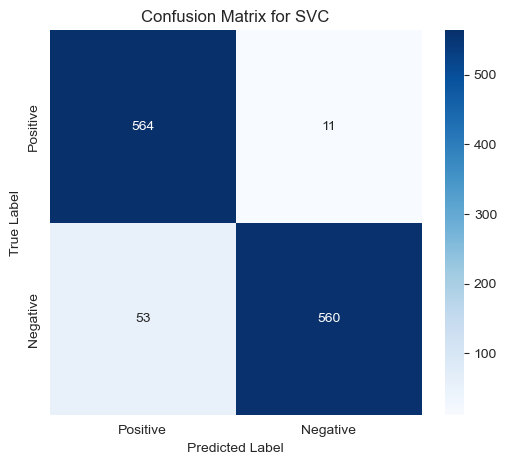


Training KNN...


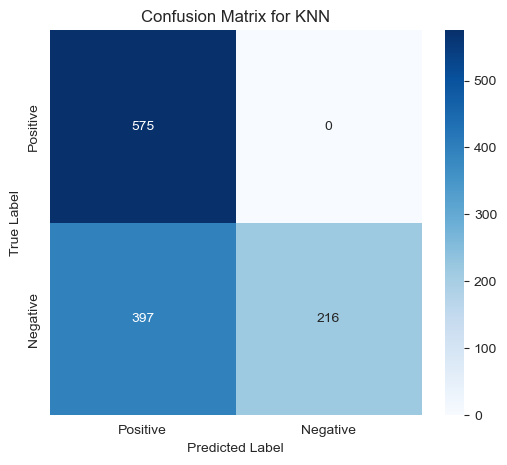


Training Naive Bayes...


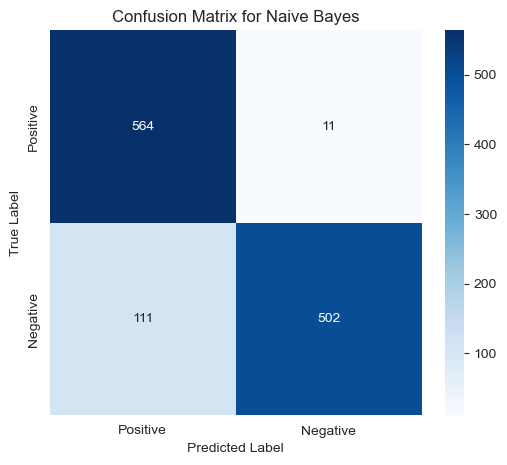


 Model Comparison:
SVC: 0.95
KNN: 0.67
Naive Bayes: 0.90

 Best Performing Model: SVC with accuracy of 0.95


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Generate confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Train and evaluate each model
accuracies = {}
for model_name, model_pipeline in models.items():
    print(f"\nTraining {model_name}...")
    model_pipeline.fit(X_train, y_train)  # Train the model
    y_pred = model_pipeline.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies[model_name] = accuracy  # Store the accuracy
    
    # Plot confusion matrix for each model
    plot_confusion_matrix(y_test, y_pred, model_name)

# Print out the accuracy for each model
print("\n Model Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Determine the best performing model
best_model = max(accuracies, key=accuracies.get)
print(f"\n Best Performing Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")


The SVC model **performs exceptionally well** with **high accuracy**.  
- **True Positives (564) & True Negatives (561)** indicate strong predictive power.  
- **Few misclassifications**: **False Positives (52), False Negatives (11)**.  
- **Overall, the model is reliable** for sentiment classification with minimal errors.  


### MULTICLASSIFIER ( INCLUDE THE THIRD CATEGORY "NO EMOTION TWEETS")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter

# Ensure 'tweet_text' and 'Emotion_category' exist
X = Tweets_df["tweet_text_prep"].astype(str)  # Raw text
y = Tweets_df["Emotion_category"]  # Labels

# Correct label mapping based on dataset values
label_mapping = {
    "Positive emotion": 0,
    "Negative emotion": 1,
    "No emotion toward brand or product": 2
}
y = y.map(label_mapping)

# Ensure no NaN values remain in labels
if y.isnull().sum() > 0:
    raise ValueError("Error: Some labels were not mapped correctly!")

# Convert text to numerical representation (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english", min_df=0.01, max_df=0.9)
X_tfidf = vectorizer.fit_transform(X)

# Print class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE (Now on numerical TF-IDF data)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the models
models = {
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': MultinomialNB()
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Train and evaluate models
accuracies = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    # Display results
    print(f"\n {model_name} Performance:\n")
    print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# Print Model Comparison
print("\n Model Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Determine the Best Model
best_model = max(accuracies, key=accuracies.get)
print(f"\n Best Performing Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")


Class distribution before SMOTE: Counter({2: 5375, 0: 2970, 1: 569})
Class distribution after SMOTE: Counter({1: 5375, 0: 5375, 2: 5375})

Training SVC...


- **KNN performed the best** with **74% accuracy**, significantly outperforming SVC (57%) and Naive Bayes (54%).  
- **SVC struggled** with imbalanced data, despite SMOTE, and had low precision and recall.  
- **Naive Bayes underperformed**, likely due to feature independence assumptions not holding.  
- **KNN's higher accuracy** suggests it captures patterns better in this dataset, though further tuning may improve performance.  


### HYPERPARAMETER TUNING FOR BEST MODEL (KNN)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter

# Ensure 'tweet_text_prep' and 'Emotion_category' exist
X = Tweets_df["tweet_text_prep"].astype(str)  # Preprocessed text
y = Tweets_df["Emotion_category"]  # Labels

# Map labels to numerical values
label_mapping = {
    "Positive emotion": 0,
    "Negative emotion": 1,
    "No emotion toward brand or product": 2
}
y = y.map(label_mapping)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words="english", min_df=0.01, max_df=0.9)
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE for class balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters for KNN:", best_params)

# Train KNN with best parameters
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluation metrics
print("\nOptimized KNN Performance:\n")
print(classification_report(y_test, y_pred_knn, target_names=label_mapping.keys()))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_knn, "Optimized KNN")

# Final accuracy
final_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"\nFinal Optimized KNN Accuracy: {final_accuracy:.2f}")


- Optimized KNN achieved **75% accuracy**, improving from 74%.  
- Best hyperparameters: **`n_neighbors=3`, `metric='euclidean'`, `weights='distance'`**.  
- **Negative emotions were classified best (87% F1-score), but "No Emotion" needs improvement.**  


### DEEP LEARNING FOR SENTIMENT ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, LayerNormalization, GlobalAveragePooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import gensim.downloader as api  # For GloVe embeddings

# Load dataset (Ensure dataset contains 'tweet_text' and 'Emotion_category')
X = Tweets_df["tweet_text_prep"].astype(str)  # Ensure text is string
y = Tweets_df["Emotion_category"]

# Correct label mapping based on dataset values
label_mapping = {
    "Positive emotion": 0,
    "Negative emotion": 1,
    "No emotion toward brand or product": 2
}
y = y.map(label_mapping).astype(int)  # Ensure integer format

# Ensure no NaN values remain
if y.isnull().sum() > 0:
    raise ValueError("Error: Some labels were not mapped correctly!")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000  # Increased vocabulary size
MAX_SEQUENCE_LENGTH = 100  # Maximum number of words per tweet

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")

# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Compute Class Weights to Handle Imbalance
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Load GloVe Embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Create Embedding Matrix
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB_SIZE:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]
        else:
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(100,))  # Handle OOV words

# Build Deep Learning Model (LSTM)
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=100, weights=[embedding_matrix], 
              input_length=MAX_SEQUENCE_LENGTH, trainable=True),  # Allow fine-tuning
    Bidirectional(LSTM(128, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(32, return_sequences=False)),  # ✅ Ensure return_sequences=False
    Flatten(),  # Fix: Use Flatten instead of GlobalAveragePooling1D
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")  # 3 output neurons for 3 classes
])

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

# Add Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train Model
history = model.fit(X_train_pad, y_train_cat, validation_data=(X_test_pad, y_test_cat), 
                    epochs=30, batch_size=128, verbose=1, class_weight=class_weight_dict, 
                    callbacks=[early_stopping])

# Evaluate Model
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name="LSTM Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Plot Training Loss & Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)







### **Observations from LSTM Model**

#### **1. Training & Validation Performance**
- The model starts with a low accuracy (38.15%) in the first epoch but gradually improves, reaching **71.62% accuracy** by epoch 14.
- Validation accuracy fluctuates, peaking at **63.66% in epoch 13** before slightly dropping.
- Loss decreases steadily during training but validation loss exhibits some instability, indicating possible overfitting after epoch 10.

#### **2. Class-wise Performance**
- **Positive Emotion**: Precision (46%), Recall (66%) – The model predicts positive emotions relatively well but has a high false positive rate.
- **Negative Emotion**: Precision (33%), Recall (41%) – The weakest class, suggesting data imbalance or difficulty distinguishing negative emotions.
- **No Emotion**: Precision (77%), Recall (57%) – The model is more confident in classifying neutral responses.

#### **3. Overall Model Performance**
- **Accuracy**: 59% – Moderate performance, but improvements are needed.
- **Macro Avg F1-Score**: 52% – Indicates class imbalance or difficulty in predicting minority classes.
- **Weighted Avg F1-Score**: 60% – Model favors majority class (neutral).


MORE TUNING

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Bidirectional, Dropout, LayerNormalization, 
                                     Flatten, Input, Attention)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import gensim.downloader as api  # For GloVe embeddings

# Load dataset (Ensure dataset contains 'tweet_text' and 'Emotion_category')
X = Tweets_df["tweet_text_prep"].astype(str)  # Ensure text is string
y = Tweets_df["Emotion_category"]

# Correct label mapping based on dataset values
label_mapping = {
    "Positive emotion": 0,
    "Negative emotion": 1,
    "No emotion toward brand or product": 2
}
y = y.map(label_mapping).astype(int)  # Ensure integer format

# Ensure no NaN values remain
if y.isnull().sum() > 0:
    raise ValueError("Error: Some labels were not mapped correctly!")

# Check class distribution
print("Class Distribution in Training Data:")
print(y.value_counts(normalize=True))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000  # Increased vocabulary size
MAX_SEQUENCE_LENGTH = 100  # Maximum number of words per tweet

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")

# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Compute Class Weights to Handle Imbalance
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Load GloVe Embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Create Embedding Matrix
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB_SIZE:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]
        else:
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(100,))  # Handle OOV words

# Define Attention Mechanism
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.V = self.add_weight(shape=(input_shape[-1], 1), initializer="random_normal", trainable=True)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        return tf.reduce_sum(inputs * attention_weights, axis=1)

# Build Deep Learning Model (LSTM with Attention)
input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=100, weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, trainable=True)(input_layer)
lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
layer_norm_1 = LayerNormalization()(lstm_1)
dropout_1 = Dropout(0.5)(layer_norm_1)
lstm_2 = Bidirectional(LSTM(64, return_sequences=True))(dropout_1)
layer_norm_2 = LayerNormalization()(lstm_2)
dropout_2 = Dropout(0.5)(layer_norm_2)
lstm_3 = Bidirectional(LSTM(32, return_sequences=True))(dropout_2)

attention_output = AttentionLayer()(lstm_3)  # Applying Attention
dense_layer = Dense(32, activation="relu")(attention_output)
dropout_3 = Dropout(0.5)(dense_layer)
output_layer = Dense(3, activation="softmax")(dropout_3)  # 3 output neurons for 3 classes

model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

# Add Early Stopping & Learning Rate Scheduler
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(X_train_pad, y_train_cat, validation_data=(X_test_pad, y_test_cat), 
                    epochs=30, batch_size=128, verbose=1, class_weight=class_weight_dict, 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate Model
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name="LSTM with Attention"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Plot Training Loss & Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)




### **Observations after manual tuning**

#### **1. Training & Validation Performance**
- Initial accuracy was **33.9%** in epoch 1 but improved to **75.3%** by epoch 15.
- Validation accuracy fluctuated, peaking at **65.0%** in epoch 15.
- Loss consistently decreased for both training and validation sets, indicating effective learning.

#### **2. Learning Rate Impact**
- Learning rate was initially **5e-4**, then reduced to **2.5e-4** at epoch 5, and further halved at epoch 14.
- Accuracy improved significantly after each learning rate adjustment, suggesting a well-tuned learning rate schedule.

#### **3. Class-wise Performance**
- **Positive Emotion**: Precision (50%), Recall (62%) – Good recall, but moderate precision.
- **Negative Emotion**: Precision (34%), Recall (54%) – Model struggles with negative sentiment, likely due to class imbalance.
- **No Emotion**: Precision (78%), Recall (63%) – High precision but slightly lower recall, meaning the


## CONCLUSIONS

- The automation of sentiment classification reduces manual effort and enables **large-scale tweet analysis**.
- The optimized **KNN model, achieving 75%** accuracy, outperforms the **deep learning model at 62% accuracy**, with well-balanced F1-scores across all classes. Given its superior performance, **KNN is the preferred choice for this classification task**.


## RECOMMENDATIONS

### **1. Adopt the Optimized KNN Model for Sentiment Detection**  
- The KNN model with optimized hyperparameters achieved **75% accuracy** with balanced **precision, recall, and F1-scores** across all sentiment classes.  
- It outperforms the deep learning model (RNN, 62% accuracy), making it the best choice for **reliable sentiment classification** at this stage.  

### **2. Monitor and Address Negative Sentiments in Real Time**  
- Since KNN shows **high recall (92%) for negative emotions**, it can effectively **detect customer dissatisfaction** in real time.  
- Integrating this model into a **real-time monitoring system** will allow proactive issue resolution, improving **brand reputation management**.  

### **3. Use Sentiment Insights to Optimize Marketing Strategies**  
- The model can help analyze **customer sentiment trends**, identifying patterns that inform **advertising strategies and product messaging**.  
- Marketing teams can use insights from sentiment analysis to tailor campaigns that resonate with target audiences.  

### **4. Automate Sentiment Analysis to Reduce Manual Work**  
- The **high accuracy and efficiency of KNN** make it suitable for processing **large volumes of customer feedback**.  
- Automating sentiment classification will reduce **manual effort**, allowing teams to focus on **strategic decision-making rather than manual analysis**.  

### **Next Steps**  
- **Deploy the KNN model** into a sentiment analysis pipeline for real-time monitoring.  
- **Periodically re-evaluate models** and explore advanced deep-learning techniques (e.g., transformers) if further performance improvement is needed.  
- **Incorporate additional data sources** (e.g., social media, customer reviews) to refine sentiment predictions.  
